<a href="https://colab.research.google.com/github/Cirdans-Home/julia-limco/blob/main/LIMCO_Julia_Lezione1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio di Introduzione alla Matematica Computazionale  
## Esercitazione 1

Questo notebook è la trasposizione in **Julia** delle esercitazioni originariamente scritte per Matlab.





---
# 📦 Setup iniziale
Carichiamo le librerie necessarie.


In [ ]:

using Plots
using Random

gr()


Plots.GRBackend()


---
# 1️⃣ Grafici in Julia

In Julia le funzioni su vettori richiedono il broadcasting:
`sin.(t)`


In [ ]:

t = 0:0.01:2π
x = sin.(t)

plot(t, x,
     title="Grafico di sin(t)",
     xlabel="t",
     ylabel="sin(t)",
     label="sin(t)")



Scala semilogaritmica: usare `yscale=:log10`


In [ ]:

x = 0:0.01:10
y = 3 .^ x

plot(x, y, title="Scala lineare", label="3^x")


In [ ]:

plot(x, y,
     yscale=:log10,
     title="Scala semilogaritmica",
     label="3^x")



---
# 2️⃣ Successione di Collatz

Sia $n$ un intero positivo. La *successione di Collatz* di valore iniziale $n$ \`e la successione di interi positivi $\{a_k\}_{k\geq 1}$ definita nel modo seguente:
\begin{eqnarray*}
&&a_1=n,\\
&&{\rm per }\,\, k\geq 1,\quad a_{k+1}=\left\{
\begin{array}{ll}\frac{a_k}{2}&{\rm se }\,\, a_k\,\, {\rm \grave{e}}\,\,{\rm pari}, \\
3a_k+1 & {\rm se }\,\, a_k\,\, {\rm \grave{e}}\,\,{\rm dispari}.\end{array}\right.
\end{eqnarray*}
La *congettura di Collatz* dice che, per qualsiasi $n$, esiste sempre un indice $h$ tale che $a_h=1$.

Ecco un esempio di successione di Collatz:
$$
3\quad 10\quad 5\quad 16\quad 8\quad 4\quad 2\quad 1\quad \ldots
$$


In [ ]:

function collatz(n::Int)
    a = [n]
    while a[end] != 1
        if iseven(a[end])
            push!(a, a[end] / 2)
        else
            push!(a, 3a[end] + 1)
        end
    end
    return a
end


collatz (generic function with 1 method)

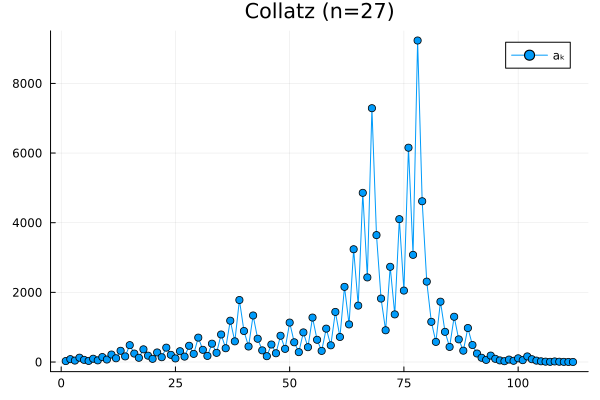

In [ ]:

a = collatz(27)
plot(a, marker=:circle, title="Collatz (n=27)", label="aₖ")



Numero di iterazioni necessarie per raggiungere 1.


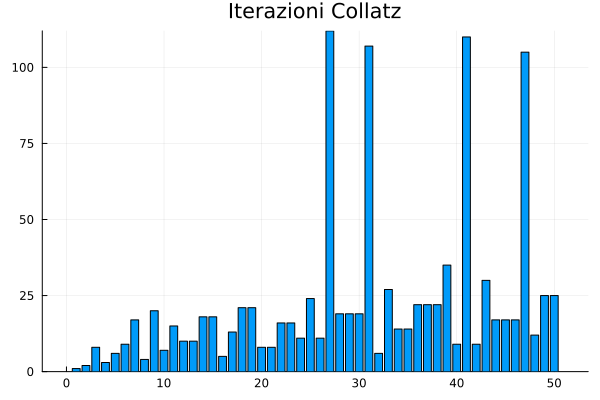

In [ ]:

function collatz_count(m::Int)
    u = zeros(Int, m)
    for j in 1:m
        u[j] = length(collatz(j))
    end
    return u
end

u = collatz_count(50)
bar(u, title="Iterazioni Collatz", label="")



---
# 3️⃣ Successione di Fibonacci


In [ ]:

function fibonacci(m::Int)
    f = zeros(Float64, m)
    f[1] = 1
    f[2] = 1
    for n in 3:m
        f[n] = f[n-1] + f[n-2]
    end
    return f
end


In [ ]:

m = 50
f = fibonacci(m)

plot(f, title="Fibonacci", label="fₙ")



Rapporto consecutivo → tende al numero aureo.


In [ ]:

r = [f[k]/f[k-1] for k in 2:m]

plot(r, title="Rapporti consecutivi", label="rₙ")
r[end]



---
# 4️⃣ Fibonacci randomizzata


In [ ]:

function rfibonacci(m)
    rf = zeros(Float64, m)
    rf[1]=1
    rf[2]=1
    for n in 3:m
        p = rand() < 0.5 ? 1 : -1
        rf[n] = rf[n-1] + p*rf[n-2]
    end
    return rf
end

m = 200
rf = rfibonacci(m)

plot(abs.(rf),
     yscale=:log10,
     title="Crescita esponenziale",
     label="|fₙ|")



---
# 5️⃣ Approssimazione di π


In [ ]:

function pigreco(m)
    k = zeros(Int, m)
    for n in 1:m
        count = 0
        r = floor(Int, sqrt(n))
        for x in -r:r
            for y in -r:r
                if x^2 + y^2 <= n
                    count += 1
                end
            end
        end
        k[n] = count
    end
    return k
end

m = 300
k = pigreco(m)
khat = k ./ (1:m)

plot(abs.(khat .- π),
     yscale=:log10,
     title="Errore approssimazione π",
     label="errore")
